In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the data in Order.csv
df_1 = pd.read_csv('/Users/kriteshsingh/Downloads/Order.csv')
df_1

,Order_ID,Item,Amount,Customer_ID
0,1,Keyboard,400,139
1,2,Mouse,300,250
2,3,Monitor,12000,239
3,4,Keyboard,400,153
4,5,Mousepad,250,153
...,...,...,...,...
245,246,Harddisk,5000,186
246,247,Webcam,350,135
247,248,Mousepad,200,110
248,249,DDR RAM,1500,176


In [3]:
#Summary of df_1 table

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_ID     250 non-null    int64 
 1   Item         250 non-null    object
 2   Amount       250 non-null    int64 
 3   Customer_ID  250 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


In [4]:
#Checking for missing values

df_1.isnull().sum()

Order_ID       0
Item           0
Amount         0
Customer_ID    0
dtype: int64

In [5]:
#Reading the data in Customer.xls
df_2 = pd.read_excel('/Users/kriteshsingh/Downloads/Customer.xls')
df_2

,Customer_ID,First,Last,Age,Country
0,1,Joseph,Rice,43,USA
1,2,Gary,Moore,71,USA
2,3,John,Walker,44,UK
3,4,Eric,Carter,38,UK
4,5,William,Jackson,58,UAE
...,...,...,...,...,...
245,246,Justin,Stewart,73,USA
246,247,John,Miller,53,USA
247,248,Thomas,Hickman,23,UK
248,249,Patricia,Garcia,19,UK


In [6]:
#Summary of df_2 table

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  250 non-null    int64 
 1   First        250 non-null    object
 2   Last         250 non-null    object
 3   Age          250 non-null    int64 
 4   Country      250 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [7]:
#Checking for missing values

df_2.isnull().sum()

Customer_ID    0
First          0
Last           0
Age            0
Country        0
dtype: int64

In [8]:
#Reading the data in Shipping.json
df_3 = pd.read_json('/Users/kriteshsingh/Downloads/Shipping.json')
df_3

,Shipping_ID,Status,Customer_ID
0,1,Pending,173
1,2,Pending,155
2,3,Delivered,242
3,4,Pending,223
4,5,Delivered,72
...,...,...,...
245,246,Pending,171
246,247,Pending,40
247,248,Delivered,37
248,249,Pending,55


In [9]:
#Summary of df_3 table

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Shipping_ID  250 non-null    int64 
 1   Status       250 non-null    object
 2   Customer_ID  250 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.0+ KB


In [10]:
#Checking for missing values

df_3.isnull().sum()

Shipping_ID    0
Status         0
Customer_ID    0
dtype: int64

In [11]:
# Merging Order data with Customer data based on Customer_ID
merged_df = pd.merge(df_1, df_2, on='Customer_ID')

# Merging the merged_df with Shipping data based on Customer_ID
merged_df = pd.merge(merged_df, df_3, on='Customer_ID')

#### 1. The total amount spent and the country for the Pending delivery status for each country.

In [12]:
pending_orders = merged_df[merged_df['Status'] == 'Pending']
total_spent_by_country = pending_orders.groupby('Country')['Amount'].sum().reset_index()

print(total_spent_by_country)

  Country  Amount
0     UAE   53800
1      UK  136300
2     USA   65500


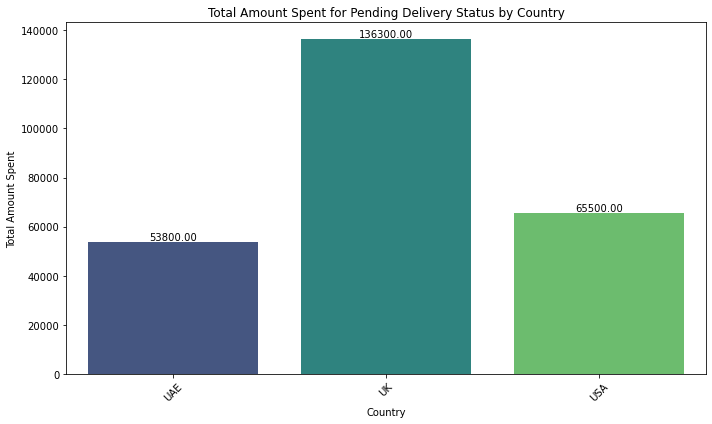

In [13]:
#Bar Plot

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country', y='Amount', data=total_spent_by_country, palette='viridis')
plt.title('Total Amount Spent for Pending Delivery Status by Country')
plt.xlabel('Country')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)

for index, row in total_spent_by_country.iterrows():
    ax.text(index, row['Amount'], f"{row['Amount']:.2f}", color='black', ha="center", va="bottom")

plt.tight_layout()
plt.show()

#### 2. The total number of transactions, total quantity sold, and total amount spent for each customer, along with the product details.

In [14]:
customer_summary = merged_df.groupby(['Customer_ID', 'First', 'Last', 'Age', 'Country']).agg({
    'Order_ID': 'count',
    'Amount': 'sum',
    'Item': lambda x: ', '.join(x)
}).reset_index()

customer_summary

,Customer_ID,First,Last,Age,Country,Order_ID,Amount,Item
0,8,Jason,Montgomery,58,UK,8,4600,"Mousepad, Mousepad, DDR RAM, DDR RAM, Webcam, ..."
1,10,Darrell,Dillon,50,UAE,2,800,"Keyboard, Keyboard"
2,12,Jodi,Gonzalez,69,USA,2,10000,"Harddisk, Harddisk"
3,13,Omar,Martin,28,UK,3,13300,"Headset, Monitor, Keyboard"
4,15,Jason,Brown,63,UAE,3,1050,"Webcam, Webcam, Webcam"
...,...,...,...,...,...,...,...,...
94,235,Melissa,Gaines,25,UAE,2,750,"Keyboard, Webcam"
95,236,Al1cia,Jensen,19,USA,2,3000,"DDR RAM, DDR RAM"
96,242,Mark,R0berts,61,USA,3,36000,"Monitor, Monitor, Monitor"
97,244,Mark,Rivers,38,UK,1,900,Headset


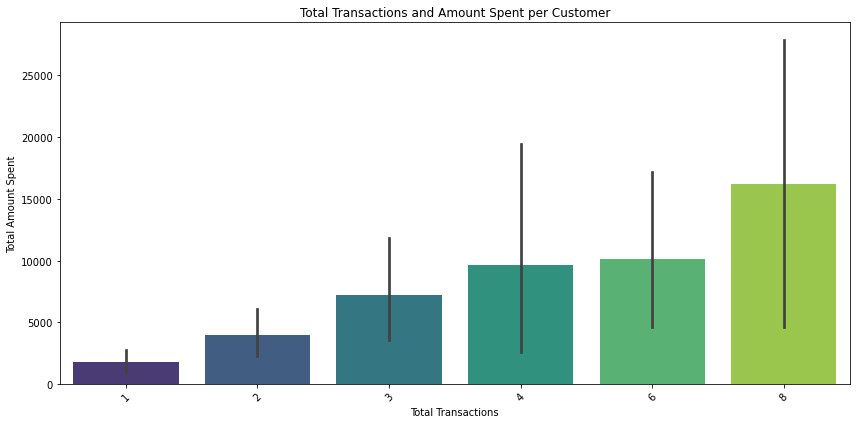

In [15]:
#Bar plot

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Order_ID', y='Amount', data=customer_summary, palette='viridis')
plt.title('Total Transactions and Amount Spent per Customer')
plt.xlabel('Total Transactions')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

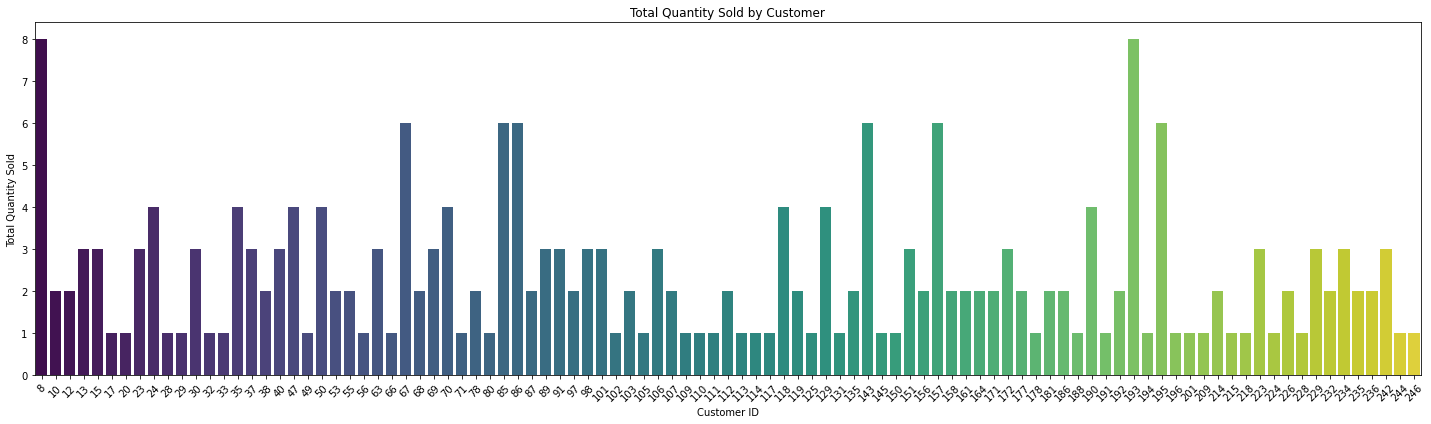

In [16]:
# Bar plot
plt.figure(figsize=(20, 6))
sns.barplot(x='Customer_ID', y='Order_ID', data=customer_summary, palette='viridis')
plt.title('Total Quantity Sold by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. The maximum product purchased for each country.

In [17]:
max_product_per_country = merged_df.groupby('Country')['Item'].agg(lambda x: x.value_counts().idxmax()).reset_index()

print(max_product_per_country)

  Country      Item
0     UAE  Keyboard
1      UK  Keyboard
2     USA  Mousepad


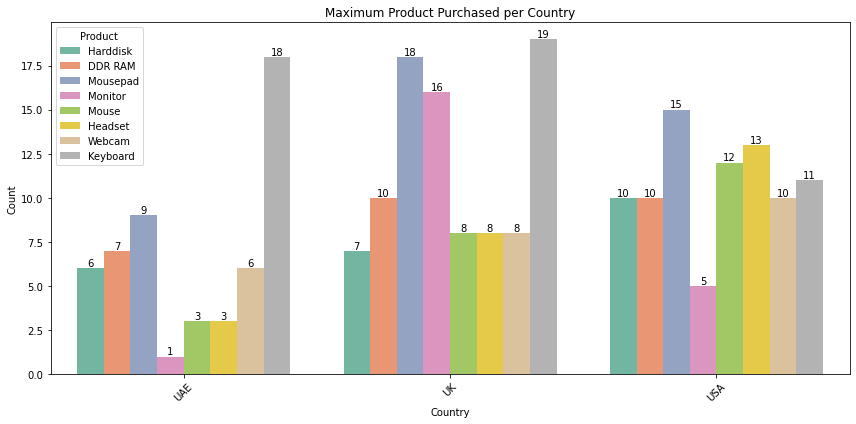

In [18]:
#Bar Plot

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=merged_df, x='Country', hue='Item', order=max_product_per_country['Country'], palette='Set2')
plt.title('Maximum Product Purchased per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product')

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

#### 4. The most purchased product based on the age category less than 30 and above 30.

In [19]:
merged_df['Age_Category'] = pd.cut(merged_df['Age'], bins=[0, 30, float('inf')], labels=['Less than 30', 'Above 30'])
most_purchased_product_by_age = merged_df.groupby('Age_Category')['Item'].agg(lambda x: x.value_counts().idxmax()).reset_index()

print(most_purchased_product_by_age)

   Age_Category      Item
0  Less than 30  Keyboard
1      Above 30  Keyboard


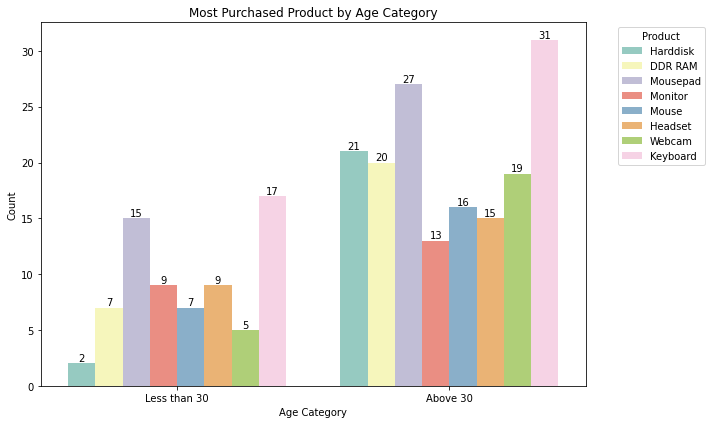

In [20]:
#Bar plot

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_df, x='Age_Category', hue='Item', palette='Set3')
plt.title('Most Purchased Product by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

#### 5. The country that had minimum transactions and sales amount.

In [21]:
country_summary = merged_df.groupby('Country').agg({
    'Order_ID': 'count',     # Total number of transactions
    'Amount': 'sum'          # Total sales amount
})

# Find the country with the minimum transactions and sales amount
min_transactions = country_summary['Order_ID'].idxmin()
min_sales_amount = country_summary['Amount'].idxmin()

print("Country with minimum transactions:", min_transactions)
print("Country with minimum sales amount:", min_sales_amount)

Country with minimum transactions: UAE
Country with minimum sales amount: UAE


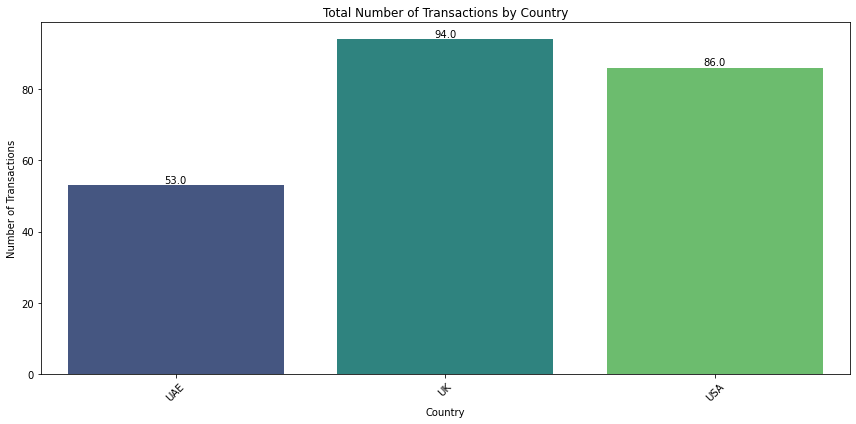

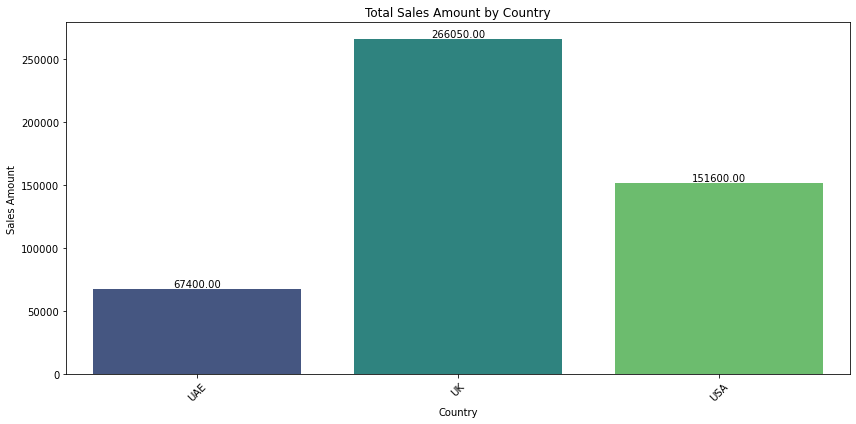

In [22]:
#Bar plot

plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=country_summary.index, y='Order_ID', data=country_summary, palette='viridis')
plt.title('Total Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for p in ax1.patches:
    ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Create a bar plot for total sales amount by country
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=country_summary.index, y='Amount', data=country_summary, palette='viridis')
plt.title('Total Sales Amount by Country')
plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)

for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


#### Here are some insights that could be shared with different peer teams and stakeholders based on the analysis conducted in the code: 

##### Data Engineers:
1. Ensure data pipelines are robust and efficient in extracting, transforming, and loading data from various sources (CSV, Excel, JSON).
2. Monitor data quality to ensure accuracy and consistency across different datasets.

##### Data Scientists:
1. Use the insights from the analysis to understand customer behavior, preferences, and trends.
2. Explore further machine learning models or predictive analytics based on the data, such as customer segmentation or sales forecasting.
3. Collaborate with data engineers to access and preprocess data for modeling purposes, ensuring data quality and integrity.

##### Technical Stakeholders:
1. Communicate findings in a clear and concise manner, highlighting key insights and actionable recommendations.
2. Discuss potential implications for business strategies or decision-making processes based on the analysis results.

##### Non-technical Stakeholders:
1. Translate technical insights into business implications, focusing on how the analysis results can drive value or inform strategic decisions.
2. Present findings in an accessible format, using visualizations or storytelling techniques to engage and educate stakeholders.